<a href="https://colab.research.google.com/github/nepatiess/aygaz_yapay_zeka/blob/main/yapay_zeka.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Kütüphaneler

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import Callback
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

### 2. Veri Setini Yükle ve Verileri Böl

In [33]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

### 3. Veri Setinin Görselleştirilmesi

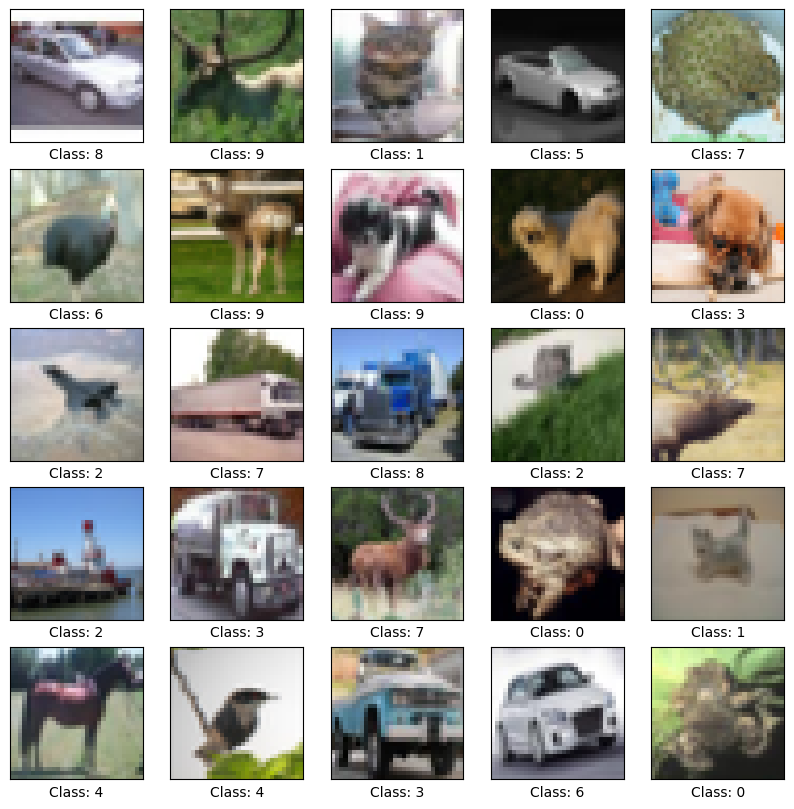

In [42]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[np.random.randint(0, len(X_test))])
    plt.xlabel(f"Class: {y_test[np.random.randint(0, len(y_test))][0]}")
plt.show()

### 4. Makine Öğrenmesi

In [43]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

### 5. KNN

In [44]:
knn = KNeighborsClassifier()
knn.fit(X_train.reshape(X_train.shape[0], -1), y_train)
knn_y_pred = knn.predict(X_test.reshape(X_test.shape[0], -1))

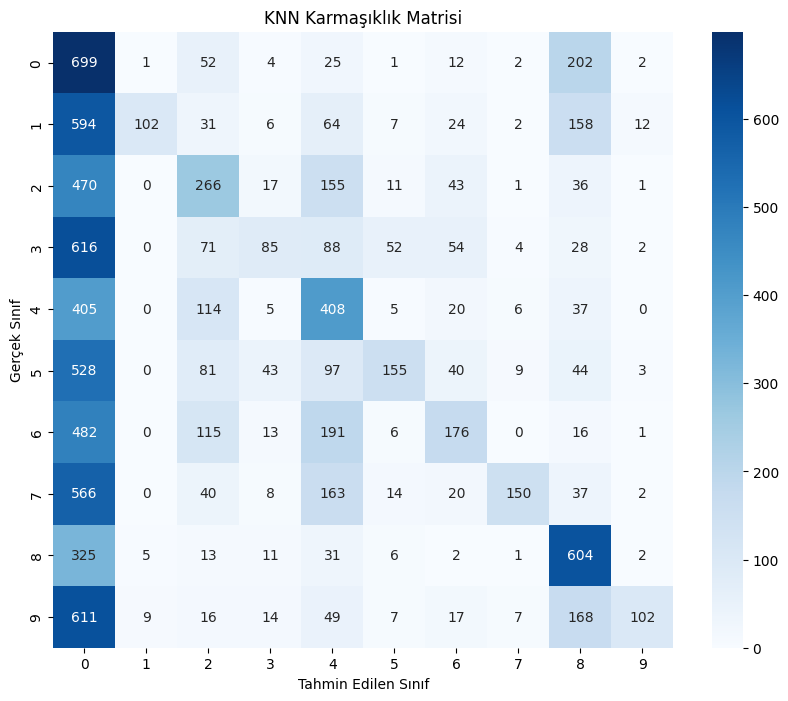

In [45]:
# KNN Modeli Karmaşıklık Matrisi
knn_cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(knn_y_pred, axis=1))
plt.figure(figsize=(10, 8))
sns.heatmap(knn_cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.title('KNN Karmaşıklık Matrisi')
plt.show()

### 6. Random Forest

In [46]:
rf = RandomForestClassifier()
rf.fit(X_train.reshape(X_train.shape[0], -1), y_train)
rf_y_pred = rf.predict(X_test.reshape(X_test.shape[0], -1))

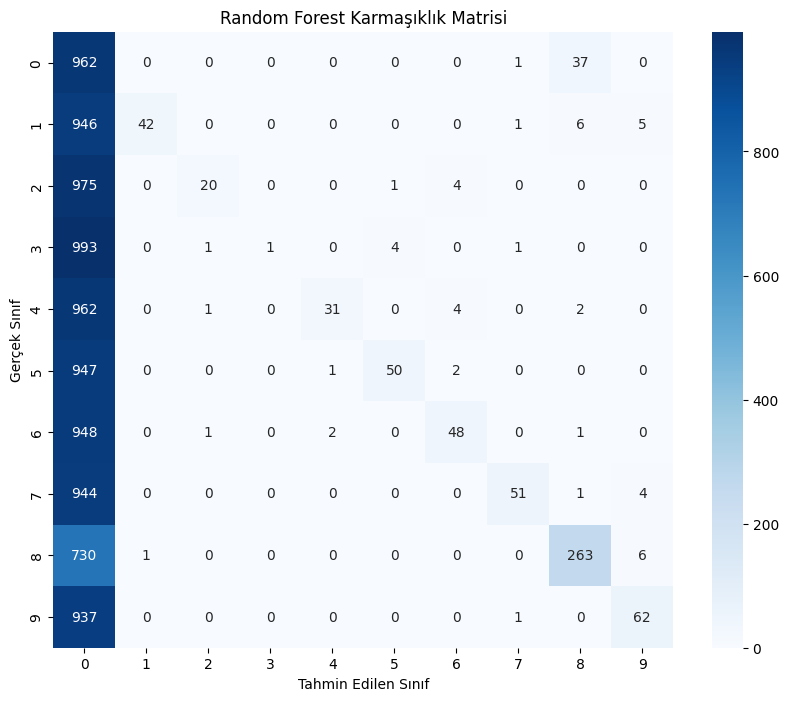

In [47]:
# Random Forest Modeli Karmaşıklık Matrisi
rf_cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(rf_y_pred, axis=1))
plt.figure(figsize=(10, 8))
sns.heatmap(rf_cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.title('Random Forest Karmaşıklık Matrisi')
plt.show()

### 7. Decision Tree

In [48]:
dt = DecisionTreeClassifier()
dt.fit(X_train.reshape(X_train.shape[0], -1), y_train)
dt_y_pred = dt.predict(X_test.reshape(X_test.shape[0], -1))

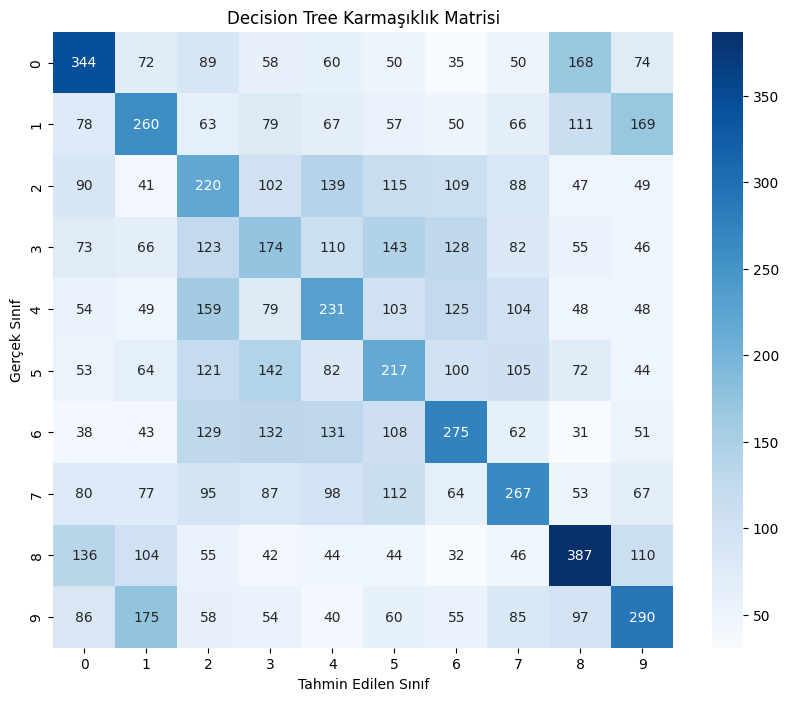

In [49]:
# Decision Tree Modeli Karmaşıklık Matrisi
dt_cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(dt_y_pred, axis=1))
plt.figure(figsize=(10, 8))
sns.heatmap(dt_cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.title('Decision Tree Karmaşıklık Matrisi')
plt.show()

### 8. YSA ile Model Oluşturma

In [22]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64)
ysa_y_pred = model.predict(X_test)
ysa_y_pred_classes = np.argmax(ysa_y_pred, axis=1)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 15, 15, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 6, 6, 64)         

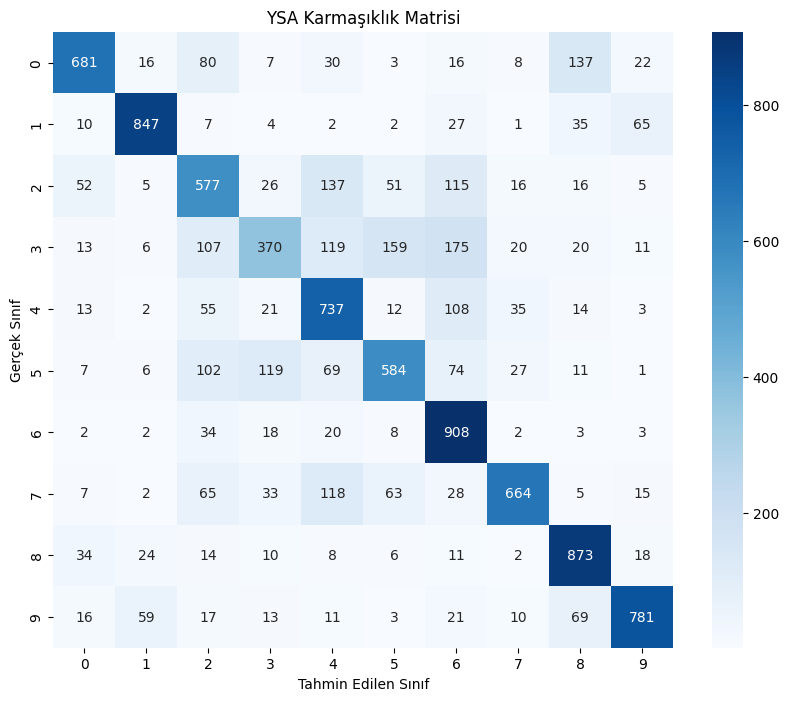

In [31]:
# YSA Modeli Karmaşıklık Matrisi
ysa_cm = confusion_matrix(np.argmax(y_test, axis=1), ysa_y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(ysa_cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.title('YSA Karmaşıklık Matrisi')
plt.show()